<a href="https://colab.research.google.com/github/diazariana/CH_DataScience/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üíµ **Default de pr√©stamos** üíµ

## Introducci√≥n

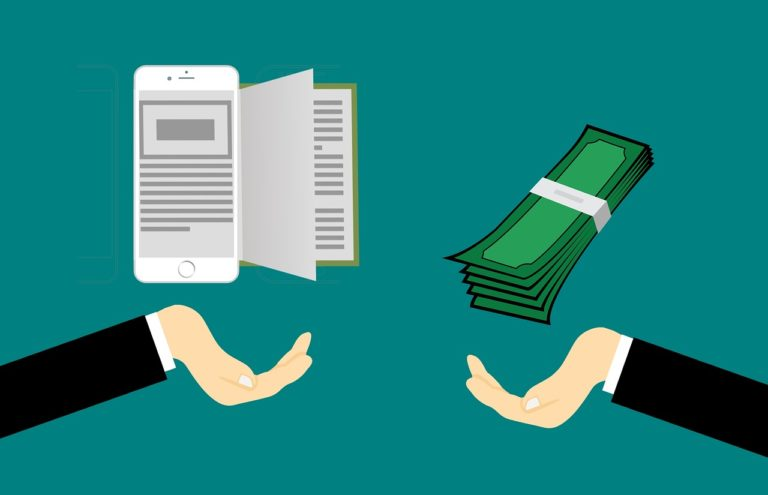


Los bancos obtienen grandes ganancias brindando pr√©stamos, aunque esto siempre est√° asociado a un riesgo, ya que el tomador puede defaultear su pr√©stamo.
Para mitigar este problema, con los datos sobre los tomadores de pr√©stamo en el pasado y empleando mecanismos de Machine Learning se puede determinar la posibilidad de que se defaultee o no un pr√©stamo.

La idea es determinar el tipo de perfil de cliente que tiene m√°s probabilidades de no pagar el pr√©stamo.

Fuente del dataset:  https://www.kaggle.com/datasets/yasserh/loan-default-dataset

El data set contiene

*   ID
*   year (a√±o, 2019)
*   Loan limit (con o sin)
*   Gender (g√©nero)
*   Approved in advance (Pre aprobado: pre, nopre)
*   Loan Type  (type1, type2)
*   Loan Purpose (p1,p2,p3,p4)
*   Credit worthiness ("merecedor del cr√©dito")
*   Open credit (El capital disponible bajo Open Credit se desembolsar√° en la cuenta que el Cliente desee: si, no)
*   Bussiness or commercial (bc, nbc)
*   Rate of interest
*   Interest rate spread
*   Upfront charges (otros cargos)
*   Term (plazo del pr√©stamo, se asume en semanas)
*   Negotiative ammortization (si, no) 
*   Interest only (si, no)
*   Lump sum payment (Un "balloon payment" o pago global es un pago √∫nico, m√°s grande de lo normal, que se hace al final del plazo del pr√©stamo: si, no)
*   Property value (valor de la propiedad puesta en garant√≠a)
*   Construction type (sb, mh)
*   Occupancy type (pr, ir)
*   Secured by (home, land)
*   Total units (se asume las unidades puestas en garant√≠a 1u, 2u,etc)
*   Income (ingresos)
*   Credit type (tipo de cr√©dito)
*   Credit Score 
*   Co-applicant credit type
*   Age (edad, rango etario)
*   Submission of application
*   LTV value (ratio pr√©stamo-valor, ratio m√°ximo del pr√©stamo al valor o porcentaje de financiaci√≥n‚Äã expresa la cantidad de un primer derecho de retenci√≥n de hipoteca como porcentaje del total del valor de tasaci√≥n de los bienes inmuebles.)
*   Region (norte, sur, etc)
*   Security type
*   Status(1= defaulted 0= not defaulted)
*   Dtir 1


























Integrantes del equipo ü¶∏:


*   Ariana Diaz
*   Federico Martucci



In [ ]:
!pip install mlxtend 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Python'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Python


In [ ]:
df=pd.read_csv('Loan_Default.csv')
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

En primer lugar, y dado que el dataset contiene 34 variables, se van a definir las m√°s significativas para poder analizarlas.

In [ ]:
df.shape

(148670, 34)

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Data Wrangling üìã

### An√°lisis valores faltantes

In [ ]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

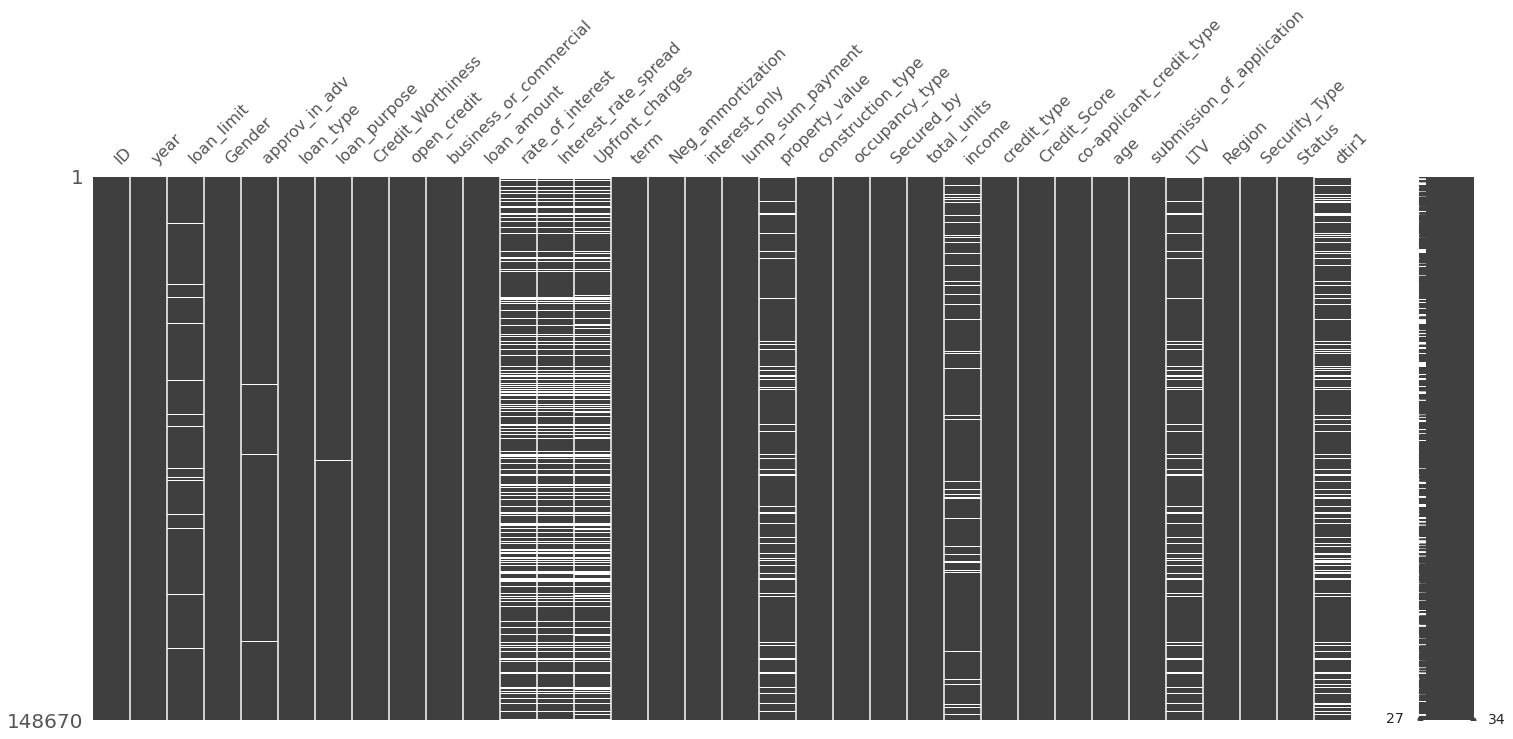

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

La mayor√≠a de los prestamos en default (Status=1) cuentan con datos faltantes en sus variables.

In [ ]:
#Primero se va a crear una uneva categor√≠a en las variables categ√≥ricas para los nan: "ns/nc"
df_clean=df.copy()
varscat=['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit',
'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 
'occupancy_type', 'Secured_by','total_units','credit_type' ,'co-applicant_credit_type', 'age', 'submission_of_application', 
'Region', 'Security_Type']
varsnoncat=['ID', 'year', 'loan_amount', 'rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value', 'income','Credit_Score','LTV', 'Status','dtir1']

for i,var in enumerate(varscat):
  df_clean[var] = np.where(df_clean[var].isnull(),"ns/nc",df_clean[var])
 

In [ ]:
#Para las variables que no son categ√≥ricas se completar√°n con la media
df_clean.fillna(df_clean.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## EDA - Exploratory Data Analysis üìä




In [ ]:
df.shape

(148670, 34)

In [ ]:
df.describe().T

count           mean            std           min  \
ID                    148670.0   99224.500000   42917.476598  24890.000000   
year                  148670.0    2019.000000       0.000000   2019.000000   
loan_amount           148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest      112231.0       4.045476       0.561391      0.000000   
Interest_rate_spread  112031.0       0.441656       0.513043     -3.638000   
Upfront_charges       109028.0    3224.996127    3251.121510      0.000000   
term                  148629.0     335.136582      58.409084     96.000000   
property_value        133572.0  497893.465696  359935.315562   8000.000000   
income                139520.0    6957.338876    6496.586382      0.000000   
Credit_Score          148670.0     699.789103     115.875857    500.000000   
LTV                   133572.0      72.746457      39.967603      0.967478   
Status                148670.0       0.246445       0.430942      0.000000   
dtir1                 124549.0      37.732932      10.545435      5.000000   

                               25%           50%            75%           max  
ID                     62057.25000   99224.50000  136391.750000  1.735590e+05  
year                    2019.00000    2019.00000    2019.000000  2.019000e+03  
loan_amount           196500.00000  296500.00000  436500.000000  3.576500e+06  
rate_of_interest           3.62500       3.99000       4.375000  8.000000e+00  
Interest_rate_spread       0.07600       0.39040       0.775400  3.357000e+00  
Upfront_charges          581.49000    2596.45000    4812.500000  6.000000e+04  
term                     360.00000     360.00000     360.000000  3.600000e+02  
property_value        268000.00000  418000.00000  628000.000000  1.650800e+07  
income                  3720.00000    5760.00000    8520.000000  5.785800e+05  
Credit_Score             599.00000     699.00000     800.000000  9.000000e+02  
LTV                       60.47486      75.13587      86.184211  7.831250e+03  
Status                     0.00000       0.00000       0.000000  1.000000e+00  
dtir1                     31.00000      39.00000      45.000000  6.100000e+01

Se realizar√° un an√°lisis de las variables que se consideran a primera vista como las m√°s destacadas.

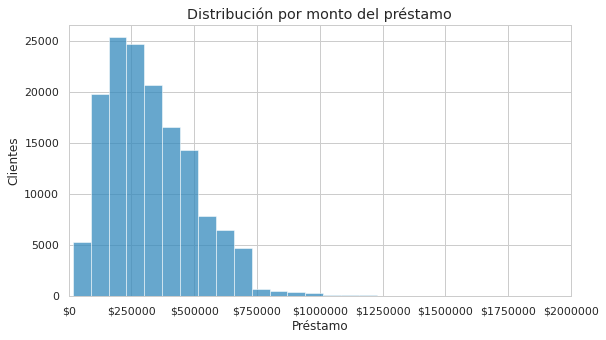

In [ ]:
#Histograma por monto del pr√©stamo
#mpl.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(9, 5))
sns.histplot(data=df, x="loan_amount", bins=50)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Pr√©stamo', ylabel='Clientes')
ax.set_title('Distribuci√≥n por monto del pr√©stamo')
plt.xlim(0,2000000)
plt.show()

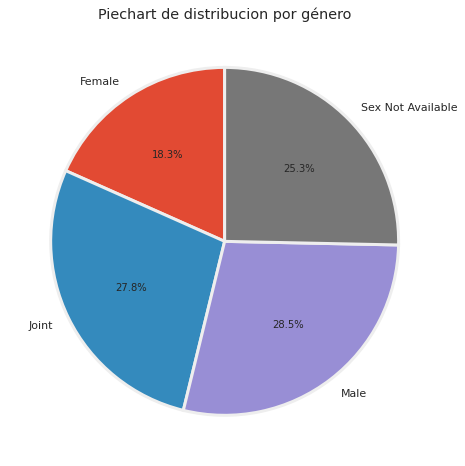

In [ ]:
df_genero=df[['ID','Gender']].groupby(by='Gender').count()
#Grafico de torta del genero de los tomadores de pr√©stamos
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize =(12, 8))
ax.pie(df_genero.ID,labels=df_genero.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax.set_title('Piechart de distribucion por g√©nero')
plt.show()

Si bien la mayor proporcion de personas que toman un prestamo son hombres (y muy cerca aquellos que son mas de una persona, por ejemplo una pareja), dado que en un 25% de los prestamistas no hay datos sobre su g√©nero, es probable que este dato no sea correcto. A priori, menor cantidad de mujeres piden prestamos que hombres.

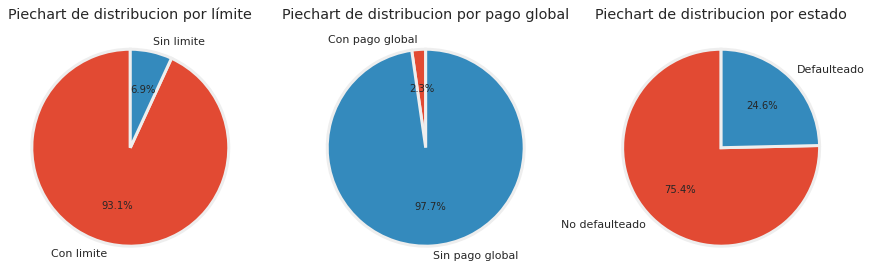

In [ ]:
df_limit=df[['ID','loan_limit']].groupby(by='loan_limit').count()
df_lump=df[['ID','lump_sum_payment']].groupby(by='lump_sum_payment').count()
df_status=df[['ID','Status']].groupby(by='Status').count()
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,9))
labels1='Con limite', 'Sin limite'
labels2='Con pago global', 'Sin pago global'
labels3='No defaulteado', 'Defaulteado' 

ax1.pie(df_limit.ID,labels=labels1, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3}, )
ax1.set_title('Piechart de distribucion por l√≠mite')

ax2.pie(df_lump.ID,labels=labels2, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax2.set_title('Piechart de distribucion por pago global')

ax3.pie(df_status.ID,labels=labels3,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax3.set_title('Piechart de distribucion por estado')
plt.show()

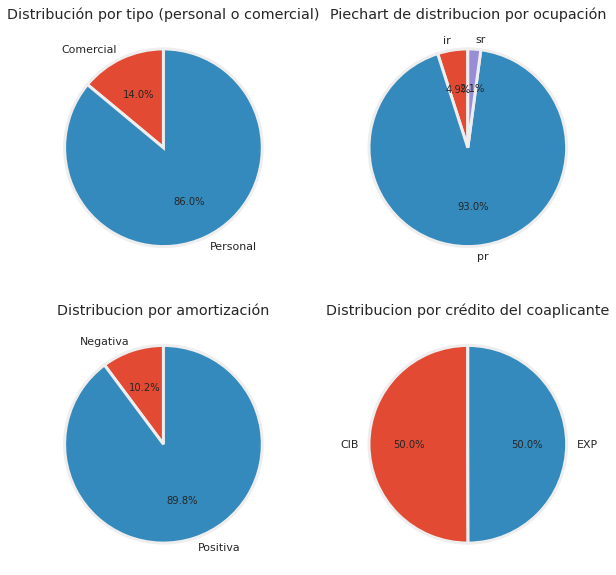

In [ ]:
df_com=df[['ID','business_or_commercial']].groupby(by='business_or_commercial').count()
df_occ_type=df[['ID','occupancy_type']].groupby(by='occupancy_type').count()
df_neg_amort=df[['ID','Neg_ammortization']].groupby(by='Neg_ammortization').count()
df_co_app=df[['ID','co-applicant_credit_type']].groupby(by='co-applicant_credit_type').count()

plt.style.use('ggplot')
fig, ax = plt.subplots(2, 2, figsize=(10,10))
labels4='Comercial', 'Personal'
labels5='Negativa',  'Positiva'

ax[0,0].pie(df_com.ID,labels=labels4, autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3}, )
ax[0,0].set_title('Distribuci√≥n por tipo (personal o comercial)')

ax[0,1].pie(df_occ_type.ID,labels=df_occ_type.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[0,1].set_title('Piechart de distribucion por ocupaci√≥n')

ax[1,0].pie(df_neg_amort.ID,labels=labels5,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,0].set_title('Distribucion por amortizaci√≥n')

ax[1,1].pie(df_co_app.ID,labels=df_co_app.index,autopct='%1.1f%%', startangle=90, wedgeprops = {'linewidth': 3})
ax[1,1].set_title('Distribucion por cr√©dito del coaplicante')
plt.show()

Text(0.5, 1.0, 'Distribuci√≥n por tipo de cr√©dito')

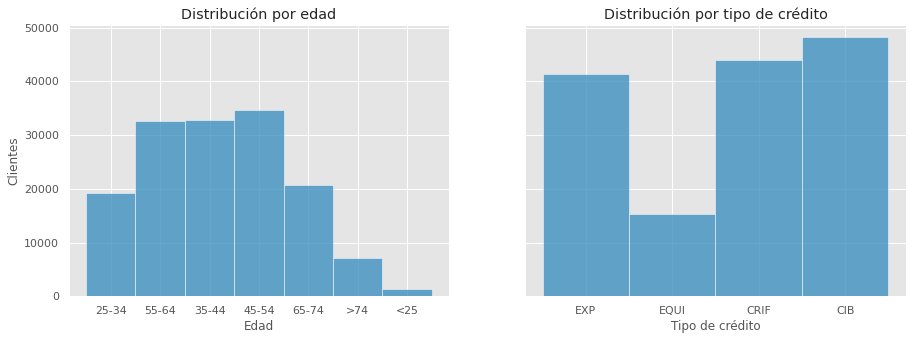

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)
sns.set_style("whitegrid")
sns.color_palette("Paired")
sns.histplot(ax=ax[0],data=df, x="age")
ax[0].set(xlabel='Edad', ylabel='Clientes')
ax[0].set_title('Distribuci√≥n por edad')

sns.histplot(ax=ax[1], data=df, x="credit_type")
ax[1].set(xlabel='Tipo de cr√©dito', ylabel='Clientes')
ax[1].set_title('Distribuci√≥n por tipo de cr√©dito')

La mayor cantidad de gente que pide prestamos se encuentra entre 35 y 64  a√±os. Los jubilados es probable que no necesiten tomar pr√©stamos y los menores de 34 quizas necesiten mayores estabilidad econ√≥mica antes de solicitar uno.


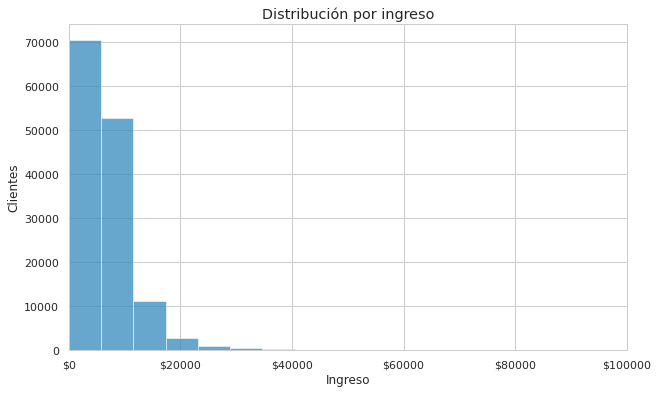

In [ ]:
#Histograma por ingresos
sns.set_style("whitegrid")
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.histplot(data=df, x="income", bins=100)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
ax.set(xlabel='Ingreso', ylabel='Clientes')
ax.set_title('Distribuci√≥n por ingreso')
plt.xlim(0,100000)
plt.show()

Como vimos en clase, son pocos los que ganan mucho y muchos los que ganan poco. Asimetr√≠a a derecha

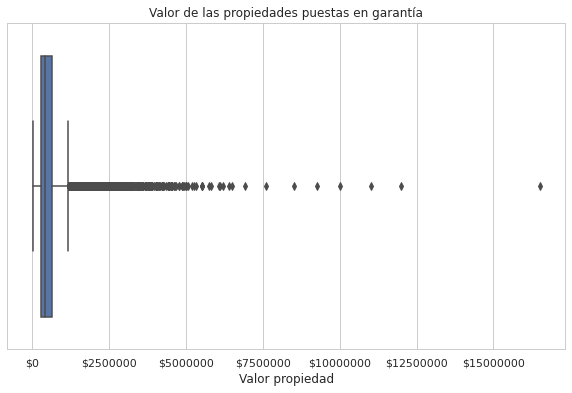

In [ ]:
#Valores de las propiedades como garant√≠a
fig,ax = plt.subplots(figsize =(10, 6))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('$%d'))
sns.boxplot(data=df, x='property_value')
ax.set(xlabel='Valor propiedad')
ax.set_title('Valor de las propiedades puestas en garant√≠a')
plt.show()

Mucha variabilidad y outliers en los precios de las propiedades.

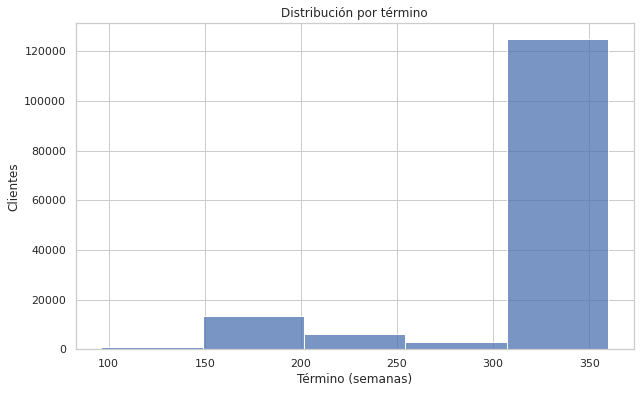

In [ ]:
#Histograma por tiempo del pr√©stamo
#No indica en que unidades es el tiempo en que se toma el pr√©stamos, se asume semanas.
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.histplot(data=df, x="term", bins=5)
ax.set(xlabel='T√©rmino (semanas)', ylabel='Clientes')
ax.set_title('Distribuci√≥n por t√©rmino')
plt.show()

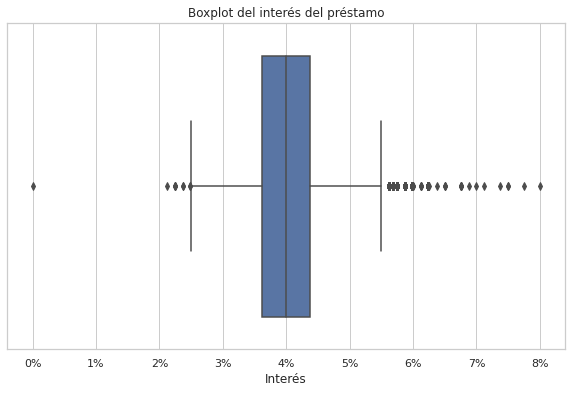

In [ ]:
#Inter√©s del pr√©stamo
sns.color_palette("Paired")
fig,ax = plt.subplots(figsize =(10, 6))
sns.boxplot(data=df, x='rate_of_interest')
ax.set(xlabel='Inter√©s')
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%d%%'))
ax.set_title('Boxplot del inter√©s del pr√©stamo')
plt.show()

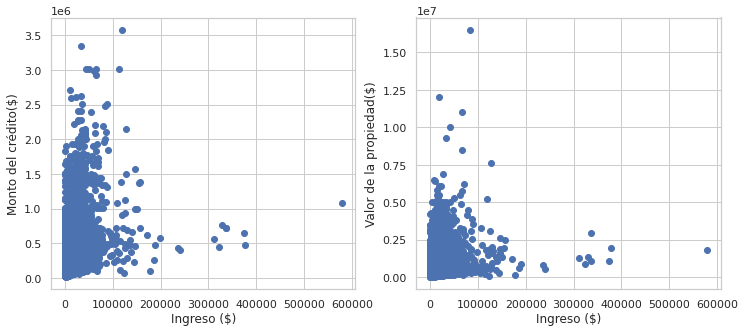

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(data=df, x='income', y='loan_amount')
plt.xlabel("Ingreso ($)")
ax1.set_ylabel("Monto del cr√©dito($)")

ax2.scatter(data=df, x='income', y='property_value')
ax1.set_xlabel("Ingreso ($)")
ax2.set_ylabel("Valor de la propiedad($)")
plt.show()

Se puede ver como las personas con menos ingresos son quienes toman pr√©stamos con montos m√°s altos.

Tiene sentido que a menor ingreso, menor sea el valor de la propiedad.

<function matplotlib.pyplot.show>

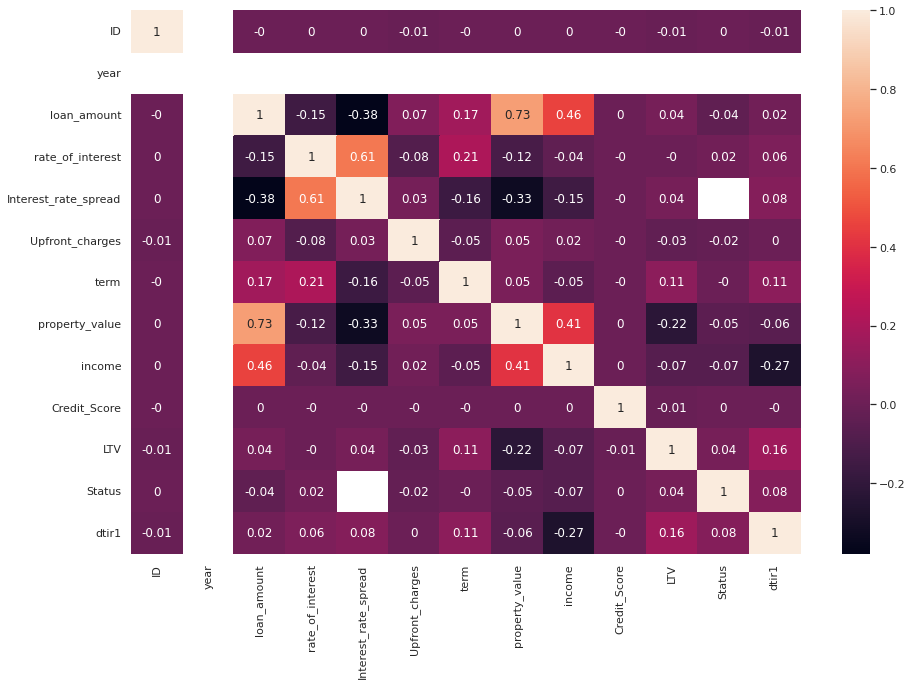

In [ ]:
#Correlation analysis
plt.figure(figsize = (15,10))
sns.heatmap(df.corr().round(2), annot=True)
plt.show

El monto del pr√©stamos se encuentra mayormente relacionado con el valor de la propiedad y el ingreso de el/los cliente(s).
El inter√©s esta bastante relacionado con  el plazo del pr√©stamo.

[Text(0, 0.5, 'Ingresos ($)'), Text(0.5, 0, 'Fin del pr√©stamo')]

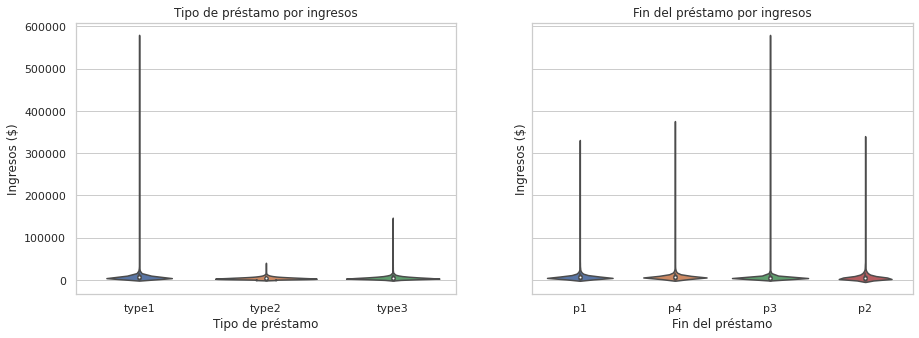

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)

sns.violinplot(data=df, ax=ax[0], x='loan_type', y='income')
ax[0].set_title('Tipo de pr√©stamo por ingresos')
ax[0].set(xlabel='Tipo de pr√©stamo', ylabel='Ingresos ($)')

sns.violinplot(data=df, ax=ax[1], x='loan_purpose', y='income')
ax[1].set_title('Fin del pr√©stamo por ingresos')
ax[1].set(xlabel='Fin del pr√©stamo', ylabel='Ingresos ($)')

Dentro de los tipos de pr√©stamo, se puede ver como en el tipo 2 y tres los ingresos son mucho menos variables que en el tipo 1.

Parece que la finalidad del pr√©stamos, en el caso 4 el monto del pr√©stamo es mayor que en los otros casos. Seguido por el caso 1 y el 3. El caso 2 ser√≠a el menor. Los montos mas variables se encuentran en el caso 1 y 4

Text(0.5, 1.0, 'Tipo de pr√©stamo por monto del pr√©stamo')

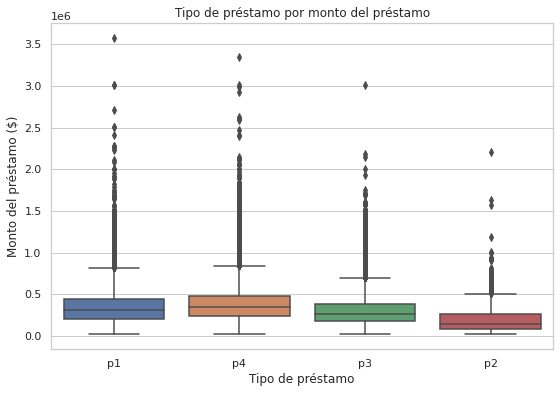

In [ ]:
#Boxplot
fig,ax = plt.subplots(figsize =(9, 6))
sns.boxplot(data=df, x='loan_purpose', y='loan_amount')
ax.set(xlabel='Tipo de pr√©stamo', ylabel='Monto del pr√©stamo ($)')
ax.set_title('Tipo de pr√©stamo por monto del pr√©stamo')

Aparentemente, el tipo prestamo 1 tiene mayores montos, seguido por el 4, 3 y 2 en ese orden.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Monto del cr√©dito')

<Figure size 432x288 with 0 Axes>

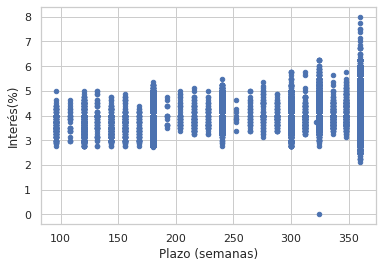

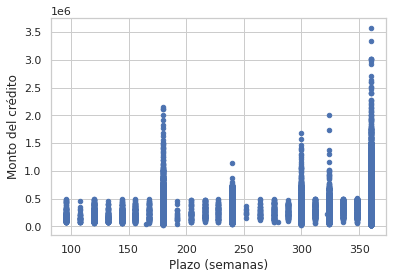

In [ ]:
fig = plt.figure()
ax1 = df.plot.scatter(x='term', y='rate_of_interest')
plt.xlabel("Plazo (semanas)")
plt.ylabel("Inter√©s(%)")

ax2 = df.plot.scatter(x="term", y="loan_amount")
plt.xlabel("Plazo (semanas)")
plt.ylabel("Monto del cr√©dito")

A simple vista, aumenta el inter√©s a medida que aumenta el plazo del cr√©dito.

Son mas altos los prestamos con plazos mayores.

Text(0, 0.5, 'Monto del cr√©dito($)')

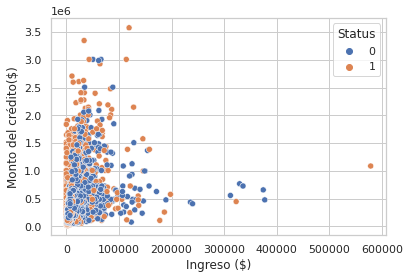

In [ ]:
sns.scatterplot(data=df,x='income', y='loan_amount', hue='Status')
plt.xlabel("Ingreso ($)")
plt.ylabel("Monto del cr√©dito($)")

Text(0, 0.5, 'Valor de la propiedad($)')

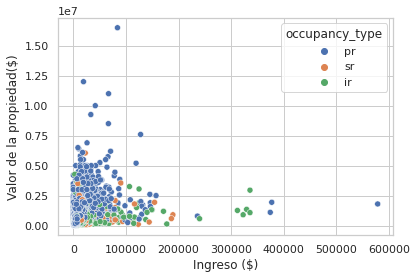

In [ ]:
sns.scatterplot(data=df, x='income', y='property_value', hue='occupancy_type')
plt.xlabel("Ingreso ($)")
plt.ylabel("Valor de la propiedad($)")

Conclusiones principales:


*  **Las personas con menos ingresos son quienes toman pr√©stamos con montos m√°s altos.**
*   **La mayor cantidad de gente que pide prestamos se encuentra entre 35 y 64 a√±os.**
*   **A menor ingreso, menor sea el valor de la propiedad**.
*   Aumenta el inter√©s a medida que aumenta el plazo del cr√©dito.
*   Son mas altos los pr√©stamos con plazos mayores.
*   La mayor√≠a de los pr√©stamos son personales.
*   **La correlaci√≥n de la variable target con las variables no categ√≥ricas es baja.**
*   **Apr√≥ximadamente un 25% de los pr√©stamos no fue abonado por el cliente.**











